# Impacto cotizacion del ORO en compañias mineras

Para el desafío de visualización en Python, he elegido un dataset relacionado con el precio del oro y las acciones de empresas mineras (Barrick Gold, HMY Gold,NEM,AEM,FNV,KGC,) junto con el índice GOLD.

El objetivo de este trabajo es analizar la relación entre el comportamiento del precio del oro y el valor bursátil de las compañías dedicadas a su extracción. Se analizarán variables como apertura, cierre, máximo, mínimo, volumen, país de origen y sector económico.

A través de técnicas de visualización de diferentes gráficos, se buscará identificar correlaciones o patrones de comportamiento entre estos activos a lo largo del tiempo. Se plantea como hipótesis que el precio del oro influye de manera directa en las cotizaciones de estas compañías, especialmente en momentos de volatilidad económica global.

Se espera que las visualizaciones permitan no solo confirmar esta hipótesis, sino también detectar posibles divergencias y oportunidades de inversión en el sector minero.

- Empresa 1: Barrick Gold
- Empresa 2: Harmony Gold (HMY)
- Empresa 3: Newmont Corporation
- Empresa 4: AngloGold Ashanti
- Empresa 5: Franco-Nevada Corporation
- Empresa 6: Kinross Gold Corporation

# Preguntas:
 - ¿Los cambios en la cotizacion del ORO afectan directamente la cotizaciones de la empreas e indice GLD?
 -  ¿En las empresa HYM and BG cuyo negocio no esta diversifiacado el impacto es mayor que en las otras?
 - ¿Sirven estas compañias como refugio de valor? 
 - ¿Que Pais tiene mayor cantidad de compañias dedicada a la extraccion de minerales?

In [26]:
#Imports
import pandas as pd
import numpy as np
from numpy import nan
from numpy import isnan
import matplotlib.pyplot as plt




#  Variable:
 - Para poder corroborar la hipotesis, se determinara el comportamiento de las acciones y el indice, en un periodo que abarcar desde el 7-04-2025 al 25-04-20205 , como muestra inicial utilizando el precio de cierre para determinar la tendencia
 - Considerando el ORO como un bien de reserva de valor se determinara mediante los precios de cierre si las compañias puede ser utilizadas como activos de reserva de valor
 - Mediante el Pais_de_origen se determinara (lugar donde reside la casa matriz) se determinara el pais con mayor cantidad de compañias minera

In [28]:
#df:importa dataset desde lap pagina de github

url = "https://raw.githubusercontent.com/dari7482/CODER_67645/refs/heads/main/DataSetGOLDAnalysis.csv"
df = pd.read_csv(url)

#df.head()

#datasetStock: dataframe con columnas reenombradas,remplazando campos vaciaos, y el formato de fecha modificado

datasetStock= df.rename(columns={'Índice de referencia':'Índice_de_referencia','País de origen':'Pais_de_origen','Variación diaria %':'Variación_diaria%'})
datasetStock[['Pais_de_origen']]=datasetStock[['Pais_de_origen']].replace('Canadá','CANADA')
datasetStock=datasetStock.replace("", np.nan)
datasetStock['Fecha'] = pd.to_datetime(datasetStock['Fecha'])
datasetStock.head()





,Nombre,Especie,Descripción,Sector,Índice_de_referencia,Pais_de_origen,Moneda,Mercado,Fecha,Cierre,Apertura,Máximo,Mínimo,Volumen,Variación_diaria%
0,Barrick Gold,BG,Productor de oro,Minería,GOLD,CANADA,USD,NYSE,2025-04-25,19.05,18.88,19.16,18.77,17.06M,-1.85%
1,Barrick Gold,BG,Productor de oro,Minería,GOLD,CANADA,USD,NYSE,2025-04-24,19.41,19.3,19.42,18.98,20.66M,1.84%
2,Barrick Gold,BG,Productor de oro,Minería,GOLD,CANADA,USD,NYSE,2025-04-23,19.06,19.01,19.21,18.79,37.52M,-4.56%
3,Barrick Gold,BG,Productor de oro,Minería,GOLD,CANADA,USD,NYSE,2025-04-22,19.97,20.76,20.83,19.88,32.35M,-2.35%
4,Barrick Gold,BG,Productor de oro,Minería,GOLD,CANADA,USD,NYSE,2025-04-21,20.45,20.9,20.94,20.22,22.37M,1.39%


In [29]:

#datasetStocfilterByMonth filtra el dataset por fechas > 2025-04-05
filterByMonth= datasetStock['Fecha'] >  pd.Timestamp("2025-04-05")
datasetStocfilterByMonth= datasetStock[filterByMonth]
datasetStocfilterByMonth.head()
    

,Nombre,Especie,Descripción,Sector,Índice_de_referencia,Pais_de_origen,Moneda,Mercado,Fecha,Cierre,Apertura,Máximo,Mínimo,Volumen,Variación_diaria%
0,Barrick Gold,BG,Productor de oro,Minería,GOLD,CANADA,USD,NYSE,2025-04-25,19.05,18.88,19.16,18.77,17.06M,-1.85%
1,Barrick Gold,BG,Productor de oro,Minería,GOLD,CANADA,USD,NYSE,2025-04-24,19.41,19.3,19.42,18.98,20.66M,1.84%
2,Barrick Gold,BG,Productor de oro,Minería,GOLD,CANADA,USD,NYSE,2025-04-23,19.06,19.01,19.21,18.79,37.52M,-4.56%
3,Barrick Gold,BG,Productor de oro,Minería,GOLD,CANADA,USD,NYSE,2025-04-22,19.97,20.76,20.83,19.88,32.35M,-2.35%
4,Barrick Gold,BG,Productor de oro,Minería,GOLD,CANADA,USD,NYSE,2025-04-21,20.45,20.9,20.94,20.22,22.37M,1.39%


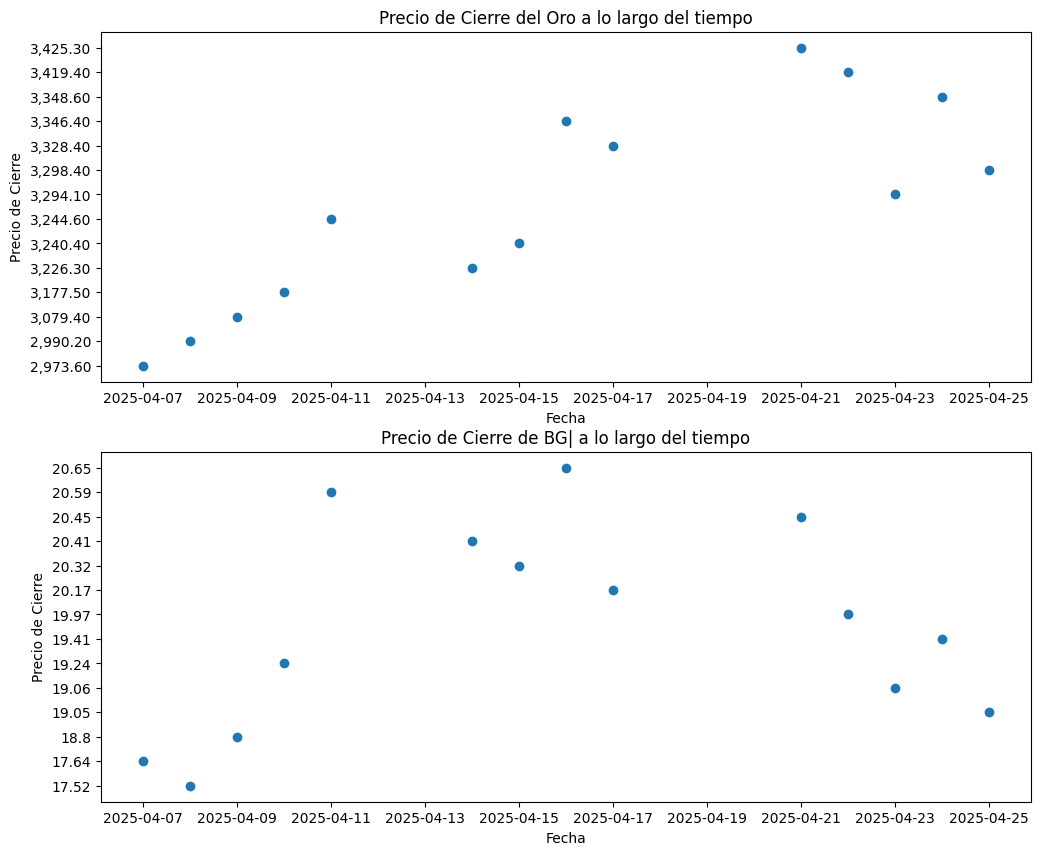

,Nombre,Especie,Descripción,Sector,Índice_de_referencia,Pais_de_origen,Moneda,Mercado,Fecha,Cierre,Apertura,Máximo,Mínimo,Volumen,Variación_diaria%
768,Materia Prima ORO,GOLD,Productor de oro,Minería,GOLD,NaN,USD,Commodities,2025-04-07,"2,973.60","3,055.10","3,084.40","2,970.40",328.52K,-2.04%
767,Materia Prima ORO,GOLD,Productor de oro,Minería,GOLD,NaN,USD,Commodities,2025-04-08,"2,990.20","2,997.50","3,037.90","2,988.60",197.58K,0.56%
766,Materia Prima ORO,GOLD,Productor de oro,Minería,GOLD,NaN,USD,Commodities,2025-04-09,"3,079.40","2,998.30","3,118.50","2,983.30",298.33K,2.98%
765,Materia Prima ORO,GOLD,Productor de oro,Minería,GOLD,NaN,USD,Commodities,2025-04-10,"3,177.50","3,099.10","3,195.00","3,086.10",234.97K,3.19%
763,Materia Prima ORO,GOLD,Productor de oro,Minería,GOLD,NaN,USD,Commodities,2025-04-14,"3,226.30","3,246.00","3,261.60","3,208.70",189.62K,-0.56%


In [113]:
#Mediante el grafico de regrecion comparo los moviemiento del ORO con las empresas 


%matplotlib inline


filterByGold = datasetStocfilterByMonth['Especie']=='GOLD' 

datasetStocfilterByGold=datasetStocfilterByMonth[filterByGold]
datasetStocfilterByGold = datasetStocfilterByGold.sort_values(by="Cierre")

filterByBG = datasetStocfilterByMonth['Especie']=='BG' 

datasetStocfilterBG=datasetStocfilterByMonth[filterByBG]
datasetStocfilterBG = datasetStocfilterBG.sort_values(by="Cierre")

filterByBG = datasetStocfilterByMonth['Especie']=='HMY' 

datasetStocfilterBG=datasetStocfilterByMonth[filterByBG]
datasetStocfilterBG = datasetStocfilterBG.sort_values(by="Cierre")





x_scatter = datasetStocfilterByGold['Fecha']
y_scatter = datasetStocfilterByGold['Cierre']

# Crear figura y ejes
fig, (ax1, ax2)  = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Crear el gráfico de dispersión
ax1.scatter(x_scatter, y_scatter)

# Etiquetas y título
ax1.set_xlabel("Fecha")
ax1.set_ylabel("Precio de Cierre")
ax1.set_title("Precio de Cierre del Oro a lo largo del tiempo")
#x1.tick_params(axis='x', rotation=45)

# Crear el gráfico de dispersión
x2_scatter = datasetStocfilterBG['Fecha']
y2_scatter = datasetStocfilterBG['Cierre']
ax2.scatter(x2_scatter, y2_scatter)

# Etiquetas y título
ax2.set_xlabel("Fecha")
ax2.set_ylabel("Precio de Cierre")
ax2.set_title("Precio de Cierre de HYM| a lo largo del tiempo")

# Etiquetas y título
ax1.set_xlabel("Fecha")
ax1.set_ylabel("Precio de Cierre")
ax1.set_title("Precio de Cierre del Oro a lo largo del tiempo")
#x1.tick_params(axis='x', rotation=45)

# Crear el gráfico de dispersión
x2_scatter = datasetStocfilterBG['Fecha']
y2_scatter = datasetStocfilterBG['Cierre']
ax2.scatter(x2_scatter, y2_scatter)

# Etiquetas y título
ax2.set_xlabel("Fecha")
ax2.set_ylabel("Precio de Cierre")
ax2.set_title("Precio de Cierre de BG| a lo largo del tiempo")




plt.show()
datasetStocfilterByGold.head()

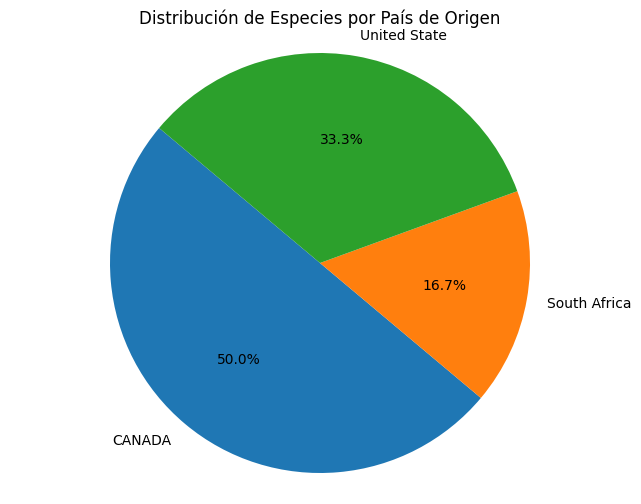

,Pais_de_origen,Cantidad
0,CANADA,3
1,South Africa,1
2,United State,2


In [75]:
datasetByEmpresa=datasetStock[['Especie','Pais_de_origen']]

datasetByEmpresa=datasetByEmpresa.drop_duplicates(subset='Especie')

filterByEmpresa = datasetByEmpresa['Especie'] != 'GOLD' 
datsetfilterByEmpresa = datasetByEmpresa[filterByEmpresa].sort_values(by="Especie")

filterByEmpresaGLD = datsetfilterByEmpresa['Especie'] != 'GLD' 
datasetfilterByEmpresaNotGLD = datsetfilterByEmpresa[filterByEmpresaGLD].sort_values(by="Especie")





cantidad = datasetfilterByEmpresaNotGLD.groupby('Pais_de_origen')
categorias = datasetfilterByEmpresaNotGLD['Pais_de_origen']

cantidad_Paises=cantidad.count()
cantidad_Paises = cantidad_Paises.reset_index()  
cantidad_Paises.columns = ['Pais_de_origen', 'Cantidad']

plt.figure(figsize=(8, 6))
plt.pie(cantidad_Paises['Cantidad'], labels=cantidad_Paises['Pais_de_origen'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Especies por País de Origen')
plt.axis('equal') 
plt.show()



cantidad_Paises.head()






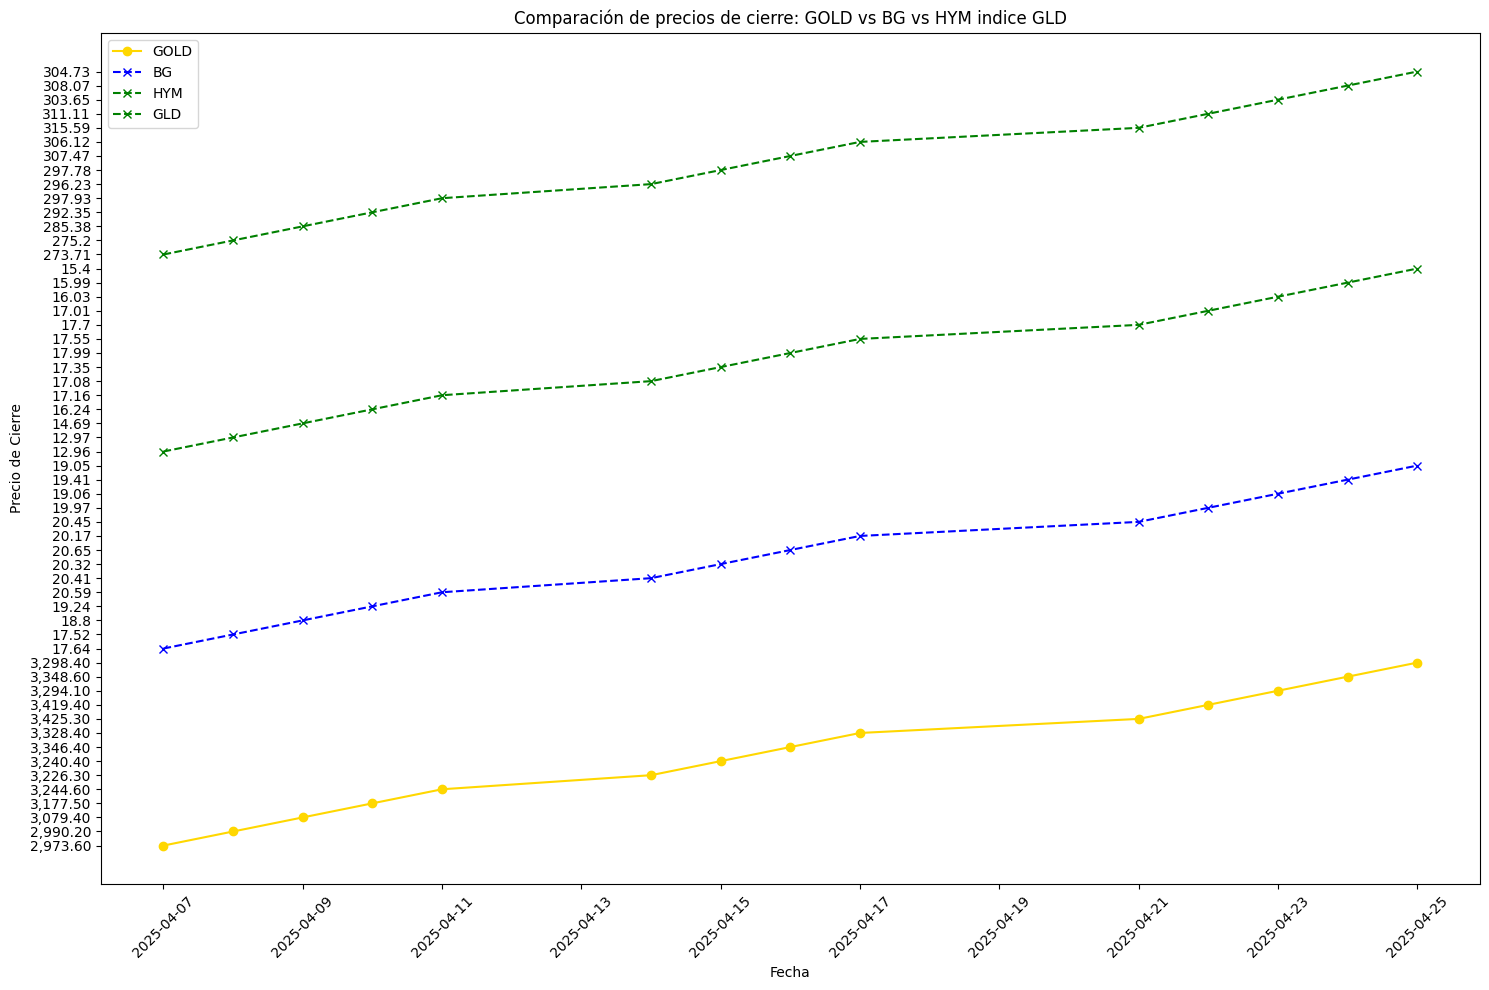

In [38]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


filterByGold = datasetStocfilterByMonth['Especie'] == 'GOLD'
datasetStocfilterByGold = datasetStocfilterByMonth[filterByGold].sort_values(by="Fecha")


filterByBG = datasetStocfilterByMonth['Especie'] == 'BG'
datasetStocfilterBG = datasetStocfilterByMonth[filterByBG].sort_values(by="Fecha")

filterByHYM = datasetStocfilterByMonth['Especie'] == 'HMY'
datasetStocfilterHYM = datasetStocfilterByMonth[filterByHYM].sort_values(by="Fecha")

filterByGLD = datasetStocfilterByMonth['Especie'] == 'GLD'
datasetStocfilterGLD = datasetStocfilterByMonth[filterByGLD].sort_values(by="Fecha")



x_gold = datasetStocfilterByGold['Fecha']
y_gold = datasetStocfilterByGold['Cierre']

x_bg = datasetStocfilterBG['Fecha']
y_bg = datasetStocfilterBG['Cierre']

x_GLD= datasetStocfilterGLD['Fecha']
y_GLD = datasetStocfilterGLD['Cierre']


fig, ax = plt.subplots(figsize=(15, 10))


ax.plot(x_gold, y_gold, label="GOLD", color='gold', marker='o', linestyle='-')
ax.plot(x_bg, y_bg, label="BG", color='blue', marker='x', linestyle='--')
ax.plot(x_HYM, y_HYM, label="HYM", color='green', marker='x', linestyle='--')
ax.plot(x_GLD, y_GLD, label="GLD", color='', marker='x', linestyle='--')


ax.set_xlabel("Fecha")
ax.set_ylabel("Precio de Cierre")
ax.set_title("Comparación de precios de cierre: GOLD vs BG vs HYM indice GLD")
plt.xticks(rotation=45)
ax.legend()

plt.tight_layout()
plt.show()
